In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import os
import glob
import datetime

### Combining 2016 Data

In [2]:
#read the path
file_path_2016 = "../data/parking-tickets-2016"
#list all the files from the directory
file_list_2016 = os.listdir(file_path_2016)

In [3]:
df_2016 = pd.DataFrame()

# Append all files together
for file in file_list_2016:
    df_temp = pd.read_csv(f'../data/parking-tickets-2016/{file}')
    df_2016 = pd.concat([df_2016, df_temp], ignore_index=True)

### Combining 2017 Data

In [4]:
#read the path
file_path_2017 = "../data/parking-tickets-2017"
#list all the files from the directory
file_list_2017 = os.listdir(file_path_2017)

In [5]:
df_2017 = pd.DataFrame()

# Append all files together
for file in file_list_2017:
    df_temp = pd.read_csv(f'../data/parking-tickets-2017/{file}')
    df_2017 = pd.concat([df_2017, df_temp], ignore_index=True)

### Combining 2018 Data

In [6]:
#read the path
file_path_2018 = "../data/parking-tickets-2018"
#list all the files from the directory
file_list_2018 = os.listdir(file_path_2018)

In [7]:
df_2018 = pd.DataFrame()

# Append all files together
for file in file_list_2018:
    df_temp = pd.read_csv(f'../data/parking-tickets-2018/{file}')
    df_2018 = pd.concat([df_2018, df_temp], ignore_index=True)

### Combining 2019 Data

In [8]:
#read the path
file_path_2019 = "../data/parking-tickets-2019"
#list all the files from the directory
file_list_2019 = os.listdir(file_path_2019)

In [9]:
df_2019 = pd.DataFrame()

# Append all files together
for file in file_list_2019:
    df_temp = pd.read_csv(f'../data/parking-tickets-2019/{file}')
    df_2019 = pd.concat([df_2019, df_temp], ignore_index=True)

### Combining 2020 Data

In [10]:
#read the path
file_path_2020 = "../data/parking-tickets-2020"
#list all the files from the directory
file_list_2020 = os.listdir(file_path_2020)

In [11]:
df_2020 = pd.DataFrame()

# Append all files together
for file in file_list_2020:
    df_temp = pd.read_csv(f'../data/parking-tickets-2020/{file}')
    df_2020 = pd.concat([df_2020, df_temp], ignore_index=True)

### Combining 2021 Data

In [12]:
#read the path
file_path_2021 = "../data/parking-tickets-2021"
#list all the files from the directory
file_list_2021 = os.listdir(file_path_2021)

In [13]:
df_2021 = pd.DataFrame()

# Append all files together
for file in file_list_2021:
    df_temp = pd.read_csv(f'../data/parking-tickets-2021/{file}')
    df_2021 = pd.concat([df_2021, df_temp], ignore_index=True)

### Combining 2022 Data

In [14]:
#read the path
file_path_2022 = "../data/parking-tickets-2022"
#list all the files from the directory
file_list_2022 = os.listdir(file_path_2022)

In [15]:
df_2022 = pd.DataFrame()

# Append all files together
for file in file_list_2022:
    df_temp = pd.read_csv(f'../data/parking-tickets-2022/{file}')
    df_2022 = pd.concat([df_2022, df_temp], ignore_index=True)

### Merging Data Frames

In [16]:
frames = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
df_merged = pd.concat(frames)

In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13364473 entries, 0 to 1821886
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   tag_number_masked       object 
 1   date_of_infraction      int64  
 2   infraction_code         float64
 3   infraction_description  object 
 4   set_fine_amount         int64  
 5   time_of_infraction      float64
 6   location1               object 
 7   location2               object 
 8   location3               object 
 9   location4               object 
 10  province                object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


In [18]:
df_merged.shape

(13364473, 11)

#### Going to check what each column means, starting with `tag_number_masked`. Seems like they are the id number for each ticket made. Let's see if there are any unique values.

In [19]:
df_merged['tag_number_masked'].nunique()

100022

In [20]:
df_merged['tag_number_masked'].nunique()/df_merged.shape[0]*100

0.7484170905953418

#### There's 100k unique values of almost 13 million entries. Not sure how this column can help us, or what findings I may have, but it is best to leave it alone until I find out the best use for this column.

#### Next is `date_of_infraction`, we can change this to a datetime64[ns] format. But I noticed another column that gives me the time, `time_of_infraction` displayed in minutes. We can change both of these into datetime by combining them together into a new column. 

Checking for info or null values first. 

In [21]:
df_merged['date_of_infraction'].isna().sum()

0

We have no null values for `date_of_infraction` but we do for `time_of_infraction`. So once we combine them we will get 9337 null values. Let's get the average time for each day of the year and use that value to fill in the null values. Let's move on to changing its `dtype`.

In [22]:
df_merged['date_of_infraction'].head()

0    20161230
1    20161230
2    20161230
3    20161230
4    20161230
Name: date_of_infraction, dtype: int64

In [23]:
df_merged['date_of_infraction'] = pd.to_datetime(df_merged['date_of_infraction'], format='%Y%m%d')
df_merged['date_of_infraction'].head()

0   2016-12-30
1   2016-12-30
2   2016-12-30
3   2016-12-30
4   2016-12-30
Name: date_of_infraction, dtype: datetime64[ns]

In [24]:
df_merged['time_of_infraction'].head()

0    1637.0
1    1637.0
2    1637.0
3    1637.0
4    1637.0
Name: time_of_infraction, dtype: float64

I cannot just change this by making unit into minutes, otherwise 1637 will give me a combination of minutes instead of separating hours and minutes into 16:37:00, 
let's do a format by breaking it down to hours and minutes.

In [25]:
df_merged['hours'] = df_merged['time_of_infraction'] // 100
df_merged['minutes'] = df_merged['time_of_infraction'] % 100

In [26]:
df_merged['hours'] = pd.to_timedelta(df_merged['hours'], unit='h')
df_merged['minutes'] = pd.to_timedelta(df_merged['minutes'], unit='m')

In [27]:
# Combine date and time columns into a single datetime column
df_merged['time_of_infraction'] = (df_merged['hours'] + df_merged['minutes']).astype(str)
df_merged['time_of_infraction'] = df_merged['time_of_infraction'].astype(str).str.split().str[-1]

In [28]:
df_merged['time_of_infraction']

0          16:37:00
1          16:37:00
2          16:37:00
3          16:37:00
4          16:37:00
             ...   
1821882    09:46:00
1821883    09:47:00
1821884    09:47:00
1821885    09:47:00
1821886    09:47:00
Name: time_of_infraction, Length: 13364473, dtype: object

#### Since I have date and time, I don't think I need a necessary datetime of both, so I shall leave that separate for now, unless necessary. 

In [29]:
#not running, non existent
df_merged['datetime_of_infraction'] = df_merged['date_of_infraction'] + df_merged['hours'] + df_merged['minutes']

Now we can see this as its own column. Best to remove `hours` and `minutes` columns.

In [30]:
df_merged.drop(columns = ['hours', 'minutes', 'tag_number_masked'], inplace=True)

As mentioned before, we'll have some null values in `time_of_infraction` we'd have to look into. 9337 time entries. Let's see if we can get average time by day. 

In [31]:
df_merged[df_merged['time_of_infraction'].astype(str) == '00:00:00'].count()

date_of_infraction        2996
infraction_code           2996
infraction_description    2996
set_fine_amount           2996
time_of_infraction        2996
location1                 2621
location2                 2995
location3                  248
location4                  250
province                  2996
datetime_of_infraction    2996
dtype: int64

This gives us the NaT values that we need to fill, which is different from the '00:00:00' entries we've seen. This is good because we don't need to worry if the conversion changed null values changed to 0, they simply changed to NaT.

In [32]:
df_merged[df_merged['time_of_infraction'].str.contains('NaT') == True].count()

date_of_infraction        9337
infraction_code           9337
infraction_description    9337
set_fine_amount           9337
time_of_infraction        9337
location1                 1525
location2                 9185
location3                  107
location4                  465
province                  9337
datetime_of_infraction       0
dtype: int64

Now that I know there's NaT values to look out for and not the 0 times. I can fill the NaT values with the average of each offence. 

Let's look into `infraction_description` and group by that with NaT values.

In [33]:
df_merged['infraction_description'].nunique()

291

In [34]:
times_per_infraction = df_merged.groupby('infraction_description')['time_of_infraction'].apply(lambda x: np.array(x))
descriptions = times_per_infraction.index
times_per_infraction

infraction_description
ANGLE PARK-METERED SPACE-FRONT                                 [17:55:00, 14:56:00]
ANGLE PARK-TOO FAR FROM METER                                  [11:23:00, 10:23:00]
ANGLE PARK-TOO FAR FROM METER                                            [11:33:00]
FAIL ANGLE PARK/STOP AT 45 DEG    [08:59:00, 08:59:00, 21:00:00, 21:02:00, 16:01...
FAIL PARK/STOP PAR RT HAND LTD                                           [14:43:00]
                                                        ...                        
STOP/STAND/PARK - NO VEND ZONE                                 [13:39:00, 20:37:00]
STOP/STAND/PARK DESIGNATE AREA                                 [23:19:00, 08:20:00]
STOP/STAND/PARK NOT DESIG AREA                                           [04:26:00]
STOP/STAND/PARK VEND CONT ZONE                                           [20:06:00]
STOP/STAND/PARK VEND NO PERMIT    [14:30:00, 15:30:00, 15:40:00, 17:07:00, 16:48...
Name: time_of_infraction, Length: 291, dtype: object

### Test for Normality

I am not sure if I need to get the mean or median of the times based on distribution. Therefore, I need to check the time's histogram to see if it's normally distributed or skewed. The issue is, I cannot go through every infraction, they have 291 unique values. Let's see if I can do a statistical test and depending on the p-value, I can take the mean or the median of the values. 

Let's get mean for now. 

In [35]:
df_merged['time_of_infraction'] = pd.to_datetime(df_merged['time_of_infraction'])

# Group by infraction_description and calculate the mean time
average_times = df_merged.groupby('infraction_description')['time_of_infraction'].apply(lambda x: np.mean(x)).reset_index()

average_times['time_of_infraction'] = average_times['time_of_infraction'].apply(lambda x: x.round('T'))

print(average_times)

/var/folders/88/fzmg9qys41g9cpc25qvl9dwr0000gn/T/ipykernel_61713/1867060712.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['time_of_infraction'] = pd.to_datetime(df_merged['time_of_infraction'])


             infraction_description  time_of_infraction
0    ANGLE PARK-METERED SPACE-FRONT 2024-03-07 16:26:00
1     ANGLE PARK-TOO FAR FROM METER 2024-03-07 10:53:00
2    ANGLE PARK-TOO FAR FROM METER  2024-03-07 11:33:00
3    FAIL ANGLE PARK/STOP AT 45 DEG 2024-03-07 13:47:00
4    FAIL PARK/STOP PAR RT HAND LTD 2024-03-07 14:43:00
..                              ...                 ...
286  STOP/STAND/PARK - NO VEND ZONE 2024-03-07 17:08:00
287  STOP/STAND/PARK DESIGNATE AREA 2024-03-07 15:50:00
288  STOP/STAND/PARK NOT DESIG AREA 2024-03-07 04:26:00
289  STOP/STAND/PARK VEND CONT ZONE 2024-03-07 20:06:00
290  STOP/STAND/PARK VEND NO PERMIT 2024-03-07 15:00:00

[291 rows x 2 columns]


#### Now let's apply these times to the NaT values based on the infraction description. 

In [36]:
nat_counts = df_merged['time_of_infraction'].isna()
nat_counts

0          False
1          False
2          False
3          False
4          False
           ...  
1821882    False
1821883    False
1821884    False
1821885    False
1821886    False
Name: time_of_infraction, Length: 13364473, dtype: bool

In [37]:
#info on itterrows - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html

for index, row in df_merged[nat_counts].iterrows():
    infraction_description = row['infraction_description']
        
    average_time = average_times[average_times['infraction_description'] == infraction_description]['time_of_infraction'].values[0]
    
    df_merged.at[index, 'time_of_infraction'] = average_time
    df_merged.at[index, 'datetime_of_infraction'] = average_time

In [38]:
df_merged['time_of_infraction'].info()

<class 'pandas.core.series.Series'>
Index: 13364473 entries, 0 to 1821886
Series name: time_of_infraction
Non-Null Count     Dtype         
--------------     -----         
13364458 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 268.4 MB


In [39]:
df_merged['datetime_of_infraction'].info()

<class 'pandas.core.series.Series'>
Index: 13364473 entries, 0 to 1821886
Series name: datetime_of_infraction
Non-Null Count     Dtype         
--------------     -----         
13364458 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 268.4 MB


### Let's get the histogram of infraction date.

In [66]:
df_year_2022 = df_merged[df_merged['datetime_of_infraction'].dt.year == 2022]

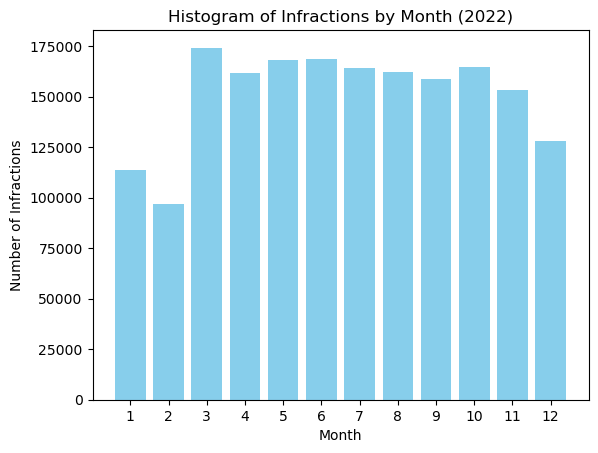

In [67]:
infraction_month = df_year_2022.groupby(df_year_2022['datetime_of_infraction'].dt.month).size()

# Plot histogram
plt.bar(infraction_month.index, infraction_month, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Infractions')
plt.title('Histogram of Infractions by Month (2022)')
plt.xticks(range(1, 13))  # Set ticks for all months
plt.show()

Looks like spring and summer gets the most tickets from March-July. There's a bounce in October, is it from holidays? We'll find out later through our analysis. 

### Let's get histogram of infraction time in 2022

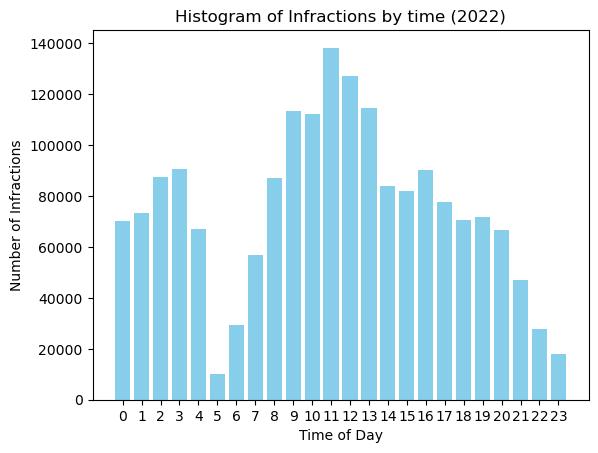

In [68]:
infraction_hour = df_year_2022.groupby(df_year_2022['datetime_of_infraction'].dt.hour).size()

# Plot histogram
plt.bar(infraction_hour.index, infraction_hour, color='skyblue')
plt.xlabel('Time of Day')
plt.ylabel('Number of Infractions')
plt.title('Histogram of Infractions by time (2022)')
plt.xticks(range(0,24))  # Set ticks for all months
plt.show()

Seems most tickets are received between 11 and 12 with a whopping 140k tickets issued around that time in total. 

In [86]:
#top 5 addresses and their violations
df_merged['location2'].value_counts().head(5)

location2
4700 KEELE ST          34952
2075 BAYVIEW AVE       31211
20 EDWARD ST           22373
15 MARINE PARADE DR    21728
4001 LESLIE ST         18575
Name: count, dtype: int64

In [81]:
df_merged['infraction_description'].value_counts()

infraction_description
PARK ON PRIVATE PROPERTY          2625372
PARK-SIGNED HWY-PROHIBIT DY/TM    2114947
PARK PROHIBITED TIME NO PERMIT    1861235
PARK MACHINE-REQD FEE NOT PAID    1582581
STOP-SIGNED HWY-PROHIBIT TM/DY     694547
                                   ...   
PARK/STAND/STOP NO PERMIT               1
PARK ON BOULEVARD                       1
ANGLE PARK-TOO FAR FROM METER           1
PARK-OBS DRIVEWAY/LANEWAY/RAMP          1
PARK LT 0.3M FROM BOTTOM STEP           1
Name: count, Length: 291, dtype: int64

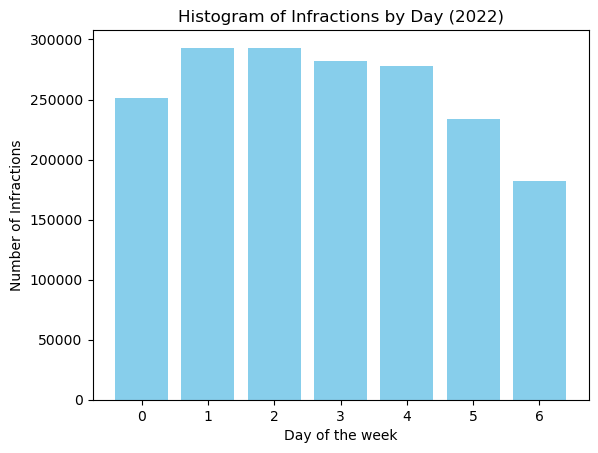

In [77]:
infraction_day = df_year_2022.groupby(df_year_2022['datetime_of_infraction'].dt.dayofweek).size()

# Plot histogram
plt.bar(infraction_day.index, infraction_day, color='skyblue')
plt.xlabel('Day of the week')
plt.ylabel('Number of Infractions')
plt.title('Histogram of Infractions by Day (2022)')
plt.xticks(range(0,7))
plt.show()

Looks like Tuesday gets the most tickets with Wednesday right after. 

In [40]:
df_merged.isna().sum()

date_of_infraction               0
infraction_code                  2
infraction_description           0
set_fine_amount                  0
time_of_infraction              15
location1                  1392113
location2                     1349
location3                 12386850
location4                 12384345
province                         3
datetime_of_infraction          15
dtype: int64

Let's fill na values, we know they're empty because it didn't need specification. To fill using one of the top value counts, let's fill with 'AT'. That way it is specified that it's address specified and there's no na values. 

In [41]:
df_merged['location1'].fillna('AT', inplace = True)

In [42]:
df_merged.isna().sum()

date_of_infraction               0
infraction_code                  2
infraction_description           0
set_fine_amount                  0
time_of_infraction              15
location1                        0
location2                     1349
location3                 12386850
location4                 12384345
province                         3
datetime_of_infraction          15
dtype: int64

In [43]:
df_merged['location1'].value_counts().head(20)

location1
NR          7409157
AT          3203305
OPP         1701073
E/S          253686
S/S          242613
N/S          234823
W/S          229310
R/O           63650
N/O            5291
S/O            4457
E/O            4173
NEAR           2862
W/O            2636
REAR            827
O/F             825
N/R             569
REAR OF         317
ON              290
OPPOSITE        204
NS OF           136
Name: count, dtype: int64

Let's combine rear and rear of by replacing anything that starts with rear using regex. 

In [45]:
df_merged.loc[df_merged.iloc[:,5].str.contains(r'^REAR.+$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
123246,2016-09-14,312.0,PARKING MACH-NOT USED/NO FEE,30,2024-03-07 17:48:00,REAR OF,5124 DUNDAS ST W,NaN,NaN,ON,2016-09-14 17:48:00
130982,2016-09-15,347.0,PARK IN A FIRE ROUTE,250,2024-03-07 22:45:00,REAR OF,128 WILLOW AVE,NaN,NaN,ON,2016-09-15 22:45:00
205348,2016-09-27,312.0,PARKING MACH-NOT USED/NO FEE,30,2024-03-07 19:21:00,REAR OF,2990 LAKE SHORE BLVD WEST,NaN,NaN,ON,2016-09-27 19:21:00
212956,2016-09-28,312.0,PARKING MACH-NOT USED/NO FEE,30,2024-03-07 19:33:00,REAR OF,5124 DUNDAS ST W,NaN,NaN,ON,2016-09-28 19:33:00
212969,2016-09-28,312.0,PARKING MACH-NOT USED/NO FEE,30,2024-03-07 19:36:00,REAR OF,5124 DUNDAS ST W,NaN,NaN,ON,2016-09-28 19:36:00
...,...,...,...,...,...,...,...,...,...,...,...
720918,2021-11-27,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 13:34:00,REAR OF,400 MCCOWAN RD,NaN,NaN,ON,2021-11-27 13:34:00
720931,2021-11-27,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 13:39:00,REAR OF,400 MCCOWAN RD,NaN,NaN,ON,2021-11-27 13:39:00
720953,2021-11-27,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 13:44:00,REAR OF,400 MCCOWAN ROAD,NaN,NaN,ON,2021-11-27 13:44:00
918993,2021-05-24,347.0,PARK IN A FIRE ROUTE,250,2024-03-07 19:30:00,REAR OF,3400 EGLINTON AVE E,NaN,NaN,ON,2021-05-24 19:30:00


In [46]:
df_merged['location1'] = df_merged['location1'].str.replace(r'^REAR.+$', 'REAR', regex=True)

In [47]:
df_merged['location1'].value_counts().head(20)

location1
NR          7409157
AT          3203305
OPP         1701073
E/S          253686
S/S          242613
N/S          234823
W/S          229310
R/O           63650
N/O            5291
S/O            4457
E/O            4173
NEAR           2862
W/O            2636
REAR           1170
O/F             825
N/R             569
ON              290
OPPOSITE        204
NS OF           136
RR              111
Name: count, dtype: int64

In [48]:
df_merged['location1'] = df_merged['location1'].str.replace(r'^OPP.+$', 'OPP', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NS.+$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^E/?S.*$', 'E/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^REAR*+$', 'R/O', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^WS.+$', 'W/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^ON$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N.?$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N.+\sOF$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^WS$', 'W/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^OP$', 'OPP', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N/B$', 'N/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^E/B$', 'E/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^W/B$', 'W/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^S/?S.*$', 'S/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^N/R$', 'NEAR', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^.*AT.*$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NEAR$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^ACROSS$', 'OPP', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NEAR.?E/?B$', 'E/B', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^`$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^O(UT)? F(RONT)?$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^E/B$', 'E/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^S/B$', 'S/S', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^NR.+$', 'AT', regex=True)

df_merged['location1'] = df_merged['location1'].str.replace(r'^.+W/B$', 'W/S', regex=True)

In [49]:
df_merged['location1'].value_counts().head(30)

location1
N/S           7644563
AT            3207449
OPP           1701482
E/S            254011
S/S            242813
W/S            229459
R/O             64820
N/O              5291
S/O              4457
E/O              4173
W/O              2636
O/F               825
RR                111
OF                 91
I/F                75
2075               39
1                  33
BR                 32
UGTNTPRK           31
18                 30
4001               24
T                  24
AR                 23
2                  22
20                 20
1000               19
10                 18
9                  17
P1 VST PKG         17
4700               16
Name: count, dtype: int64

In [50]:
#remove 0 from location 2 and merge any numbers from location 1 onto location 2 
#and set the value for location 1 to AT

df_merged[df_merged['location1'].str.contains(r'^[0-9]$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
156747,2016-09-20,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 09:50:00,1,1340 DANFORTH RD,NaN,NaN,PQ,2016-09-20 09:50:00
1183898,2016-07-05,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 00:50:00,1,120 TWENTY FORTH ST,NaN,NaN,ON,2016-07-05 00:50:00
1258451,2016-07-17,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 00:27:00,7,CRESCENT PL,NaN,NaN,ON,2016-07-17 00:27:00
1313015,2016-07-25,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 23:26:00,1,30 GILDER DR,NaN,NaN,ON,2016-07-25 23:26:00
1394295,2016-08-08,4.0,PARK ON MUNICIPAL PROPERTY,30,2024-03-07 14:00:00,1,18 HENDON AVE,NaN,NaN,ON,2016-08-08 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1125493,2022-08-15,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 02:00:00,3,0 MEADOWGLEN PL,NaN,NaN,ON,2022-08-15 02:00:00
1307188,2022-09-19,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 02:05:00,3,0 MEADOWGLEN PL,NaN,NaN,ON,2022-09-19 02:05:00
1463749,2022-10-18,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 09:20:00,9,BOGERT AVENUE,NaN,NaN,ON,2022-10-18 09:20:00
1572442,2022-10-24,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 20:17:00,5,BELLEVUE GROVE,NaN,NaN,ON,2022-10-24 20:17:00


In [51]:
df_merged[df_merged['location2'].isna()]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
13667,2016-08-28,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 05:56:00,AT,NaN,NaN,NaN,ON,2016-08-28 05:56:00
39798,2016-09-01,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 09:59:00,AT,NaN,NaN,NaN,ON,2016-09-01 09:59:00
46252,2016-09-02,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 03:42:00,AT,NaN,NaN,NaN,ON,2016-09-02 03:42:00
52533,2016-09-02,6.0,PARK-SIGNED HWY-EXC PERMT TIME,40,2024-03-07 23:29:00,AT,NaN,NaN,NaN,ON,2016-09-02 23:29:00
52598,2016-09-02,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 09:46:00,AT,NaN,NaN,NaN,ON,2024-03-07 09:46:00
...,...,...,...,...,...,...,...,...,...,...,...
1681044,2022-11-14,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 00:05:00,AT,NaN,NaN,NaN,ON,2022-11-14 00:05:00
1707684,2022-11-18,347.0,PARK IN A FIRE ROUTE,250,2024-03-07 14:23:00,FIRE ROUTE,NaN,NaN,NaN,ON,2024-03-07 14:23:00
1765660,2022-12-01,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 01:57:00,AT,NaN,NaN,NaN,ON,2022-12-01 01:57:00
1780322,2022-12-03,8.0,STAND VEH.-PROHIBIT TIME/DAY,100,2024-03-07 18:43:00,AT,NaN,NaN,NaN,ON,2022-12-03 18:43:00


In [52]:
df_merged[df_merged['location2'].isna()].shape[0]/df_merged.shape[0]

0.00010093925888435706

Very low percentage of rows with no address, so we can remove these rows. 

In [53]:
df_merged.dropna(subset=["location2"], inplace=True)

In [54]:
df_merged['location2'].isna().sum()

0

In [55]:
df_merged[df_merged['location2'].str.contains(r'^[0].+$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction
86537,2016-09-09,2.0,PARK - LONGER THAN 3 HOURS,15,2024-03-07 03:54:00,N/S,0 NORTH WOODROW BLVD,NaN,NaN,ON,2016-09-09 03:54:00
100494,2016-09-11,9.0,STOP-SIGNED HWY-PROHIBIT TM/DY,60,2024-03-07 12:25:00,N/S,03 REAN DR,NaN,NaN,ON,2016-09-11 12:25:00
112190,2016-09-13,8.0,STAND VEH.-PROHIBIT TIME/DAY,60,2024-03-07 10:30:00,N/S,0 PRINCE ARTHUR AVE,NaN,NaN,ON,2016-09-13 10:30:00
113109,2016-09-13,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2024-03-07 12:07:00,N/S,05 MARCELLINE CRES,NaN,NaN,ON,2016-09-13 12:07:00
113462,2016-09-13,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2024-03-07 12:41:00,N/S,03 REAN DR,NaN,NaN,ON,2016-09-13 12:41:00
...,...,...,...,...,...,...,...,...,...,...,...
1257917,2022-09-09,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 15:34:00,AT,00. HURON ST,NaN,NaN,ON,2022-09-09 15:34:00
1307188,2022-09-19,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 02:05:00,3,0 MEADOWGLEN PL,NaN,NaN,ON,2022-09-19 02:05:00
1427389,2022-10-11,5.0,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2024-03-07 14:07:00,N/S,0 THOMPSON ST,NaN,NaN,ON,2022-10-11 14:07:00
1502972,2022-12-12,3.0,PARK ON PRIVATE PROPERTY,30,2024-03-07 20:15:00,AT,0 DRIFTWOOD AVE,NaN,NaN,ON,2022-12-12 20:15:00


In [56]:
df_merged['location2'] = df_merged['location2'].str.replace(r'^0+(.+)$', r'\1', regex=True)

In [57]:
df_merged[df_merged['location2'].str.contains(r'^[0].+$', regex=True)]

,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,datetime_of_infraction


In [58]:
# num_in_location1 = df_merged['location1'].str.contains(r'^[0-9]+$', regex=True)
# filtered_df = df_merged[num_in_location1]  # Filter rows where 'location1' starts with a number

# df_merged.loc[num_in_location1, 'location2'] = df_merged['location1'].astype(str).str.cat(df_merged['location2'].astype(str), sep=' ')

# print(filtered_df)